<a href="https://colab.research.google.com/github/joezerr/Project/blob/main/Histogram_Equalization_Assignment_1_%7C_2440057672.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARIES

In [ ]:
#import all necessary libraries
import cv2 
import numpy as np
from matplotlib import pyplot as plt

from google.colab.patches import cv2_imshow #used to show image since cv2.imshow isnt applicable in google colab
from skimage import io #used to import image from the internet

In [ ]:
source ='https://i.pinimg.com/originals/dd/09/c9/dd09c9362c5f18e1185a031f12259332.png'

In [ ]:
#i'll be using bridge image from the internet
image = io.imread(source)

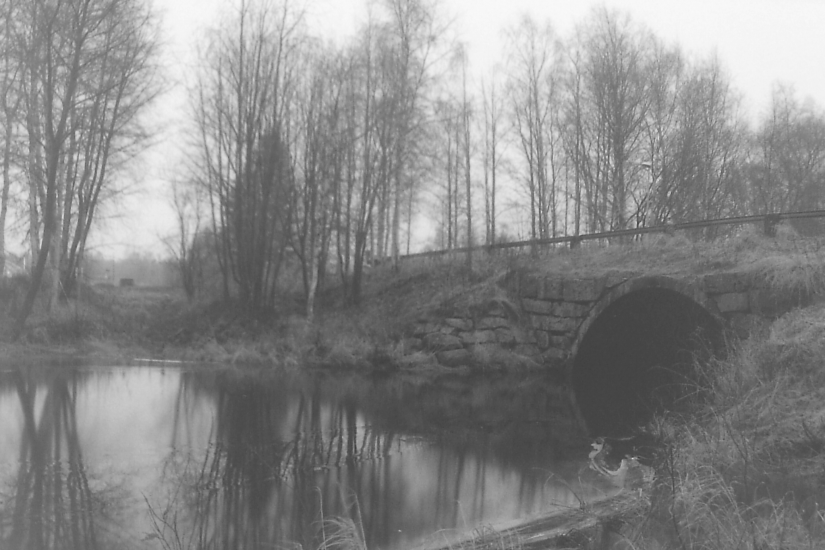

In [ ]:
cv2_imshow(image)

image successfully imported.

In [ ]:
#resize image
scale = 50/100
newHeight = int(image.shape[0] * scale)
newWidth = int(image.shape[1] * scale)
newDimension = (newWidth,newHeight)
image = cv2.resize(image, newDimension, cv2.INTER_AREA)

BEFORE EQUALIZATION HISTOGRAM

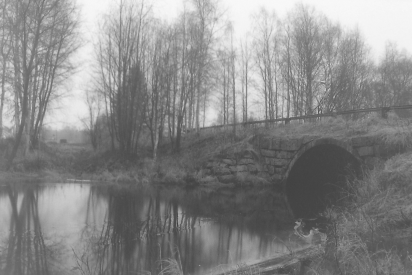

In [ ]:
#unequalized
cv2_imshow(image)

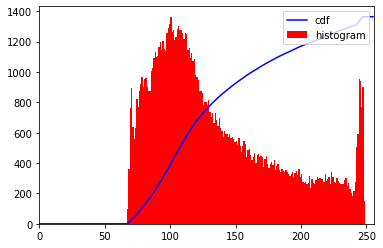

In [ ]:
#unequalized image histogram
hist,bins = np.histogram(image.flatten(),256,[0,256])

#calculate the cumulative distribution function
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

#plot the histogram
plt.plot(cdf_normalized, color = 'b')
plt.hist(image.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper right')
plt.show()

Based on the histogram above, the majority of pixel intensity lies between 60 and 200, peaking at around 100.

But, the far left area doesnt has pixel intensity values. This means that the pixel intensity values arent spread out uniformly. We can say that our unequalized image is having a bad contrast.

We can solve this problem by using equalizeHist() provided by openCV to evenly spread out the pixel intensity values

 EQUALIZATION PROCESS

In [ ]:
equalized = cv2.equalizeHist(image)

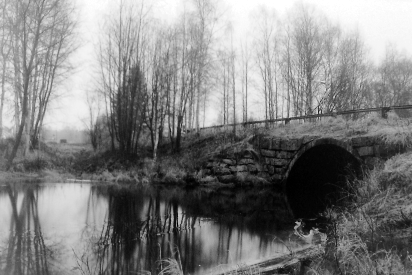

In [ ]:
#after equalization
cv2_imshow(equalized)

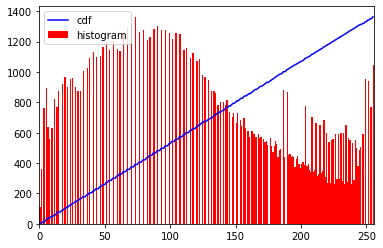

In [ ]:
#equalized image histogram
hist,bins = np.histogram(equalized.flatten(),256,[0,256])

#calculate the cumulative distribution function
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

#plot the histogram
plt.plot(cdf_normalized, color = 'b')
plt.hist(equalized.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

Now, the histogram of equalized image is shown above. The pixel intensity values are now spread out evenly from range 0 up to 255. The cumulative distribution function is also linear compared to the unequalized (original) one.

We can say that our equalized image is having a much better contrast (good) than the unequalized image.

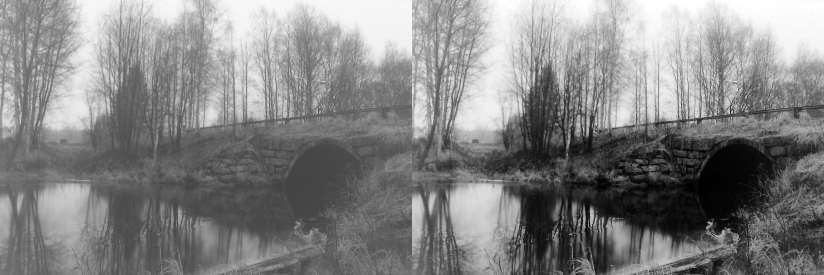

In [ ]:
#comparison
#before and after image comparison of histogram equalization
result=(image,equalized)
image2 = np.hstack(result)
cv2_imshow(image2)

References: 
- https://medium.com/@kyawsawhtoon/a-tutorial-to-histogram-equalization-497600f270e2
- https://www.youtube.com/watch?v=XgXKvZfynSg 
- https://i.pinimg.com/originals/dd/09/c9/dd09c9362c5f18e1185a031f12259332.png
- Kelas lab
